In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('/content/project/Airbnb_Open_Data.csv', low_memory=False)

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23551 entries, 0 to 23550
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23551 non-null  int64  
 1   NAME                            23475 non-null  object 
 2   host id                         23551 non-null  int64  
 3   host_identity_verified          23455 non-null  object 
 4   host name                       23510 non-null  object 
 5   neighbourhood group             23523 non-null  object 
 6   neighbourhood                   23534 non-null  object 
 7   lat                             23542 non-null  float64
 8   long                            23542 non-null  float64
 9   country                         23463 non-null  object 
 10  country code                    23471 non-null  object 
 11  instant_bookable                23471 non-null  object 
 12  cancellation_policy             

In [5]:
df.duplicated().value_counts()

,count
False,23551


In [6]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [9]:
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)

In [10]:
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)

df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

In [11]:
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'
    },
          inplace=True)

df.dropna(inplace=True)

In [12]:
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)

In [13]:
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

df=df.drop(df[df['availability 365']>500].index)

/tmp/ipython-input-3572590200.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']=pd.to_datetime(df['last review'])


In [14]:
df.duplicated().value_counts()

,count
False,18806


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18806 entries, 0 to 23549
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18806 non-null  object        
 1   NAME                            18806 non-null  object        
 2   host id                         18806 non-null  object        
 3   host_identity_verified          18806 non-null  object        
 4   host name                       18806 non-null  object        
 5   neighbourhood group             18806 non-null  object        
 6   neighbourhood                   18806 non-null  object        
 7   lat                             18806 non-null  float64       
 8   long                            18806 non-null  float64       
 9   country                         18806 non-null  object        
 10  country code                    18806 non-null  object        
 11  instant

In [16]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,18806.000000,18806.000000,18806.00000,18806.000000,18806.000000,18806.000000,18806.000000,18806,18806.000000,18806.000000,18806.000000,18806.000000
mean,40.728818,-73.955309,2012.49011,620.728916,124.147825,7.059343,41.132724,2018-04-25 15:30:34.265659648,0.967046,2.995587,3.350154,177.421036
min,40.508680,-74.239860,2003.00000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688520,-73.982638,2008.00000,329.000000,66.000000,2.000000,4.000000,2017-03-25 00:00:00,0.110000,2.000000,1.000000,50.000000
50%,40.722270,-73.956880,2012.00000,616.000000,123.000000,3.000000,14.000000,2019-01-01 00:00:00,0.370000,3.000000,1.000000,170.000000
75%,40.763987,-73.940370,2017.00000,911.000000,182.000000,5.000000,56.000000,2019-06-17 00:00:00,1.340000,4.000000,2.000000,296.000000
max,40.908040,-73.712990,2022.00000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,16.220000,5.000000,121.000000,426.000000
std,0.054070,0.040713,5.76495,334.197486,66.842625,22.004411,59.581058,NaN,1.330637,1.418206,10.976510,134.340995


What are the different property types in the Dataset?

In [17]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,10370
Private room,8170
Shared room,266


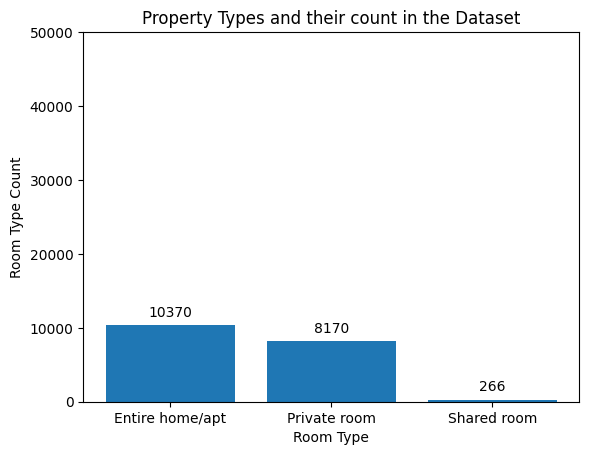

In [18]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

Which neighbourhood group has the highest number of listings?

In [19]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,8393
Brooklyn,8224
Queens,1761
Bronx,312
Staten Island,116


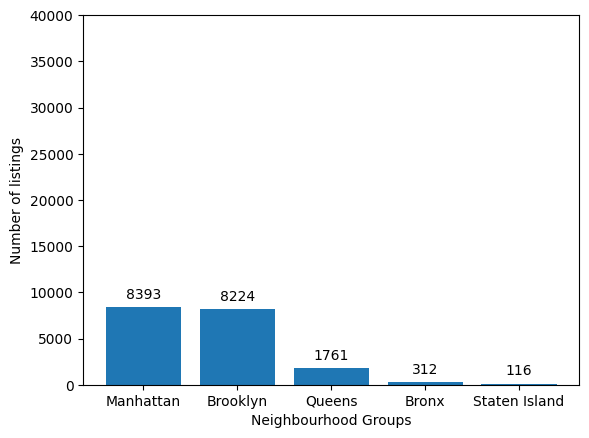

In [20]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of listings');

Which neighbourhoods group have the highest average prices for Airbnb listings?

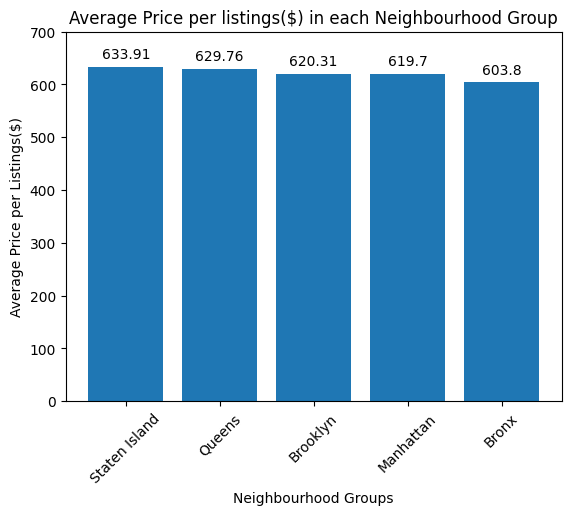

In [21]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average Price per Listings($)');
plt.xticks(rotation=45);
plt.title('Average Price per listings($) in each Neighbourhood Group');

Is there a relationship between the construction year of property and price?

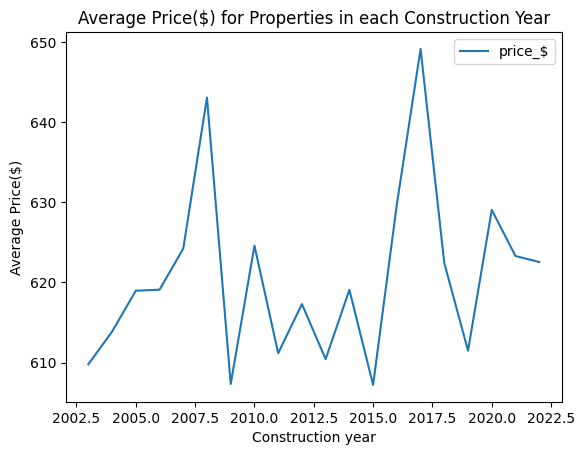

In [22]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction year');
plt.ylabel('Average Price($)');
plt.title('Average Price($) for Properties in each Construction Year');

who are the top 10 hosts by calculated host lisying count?

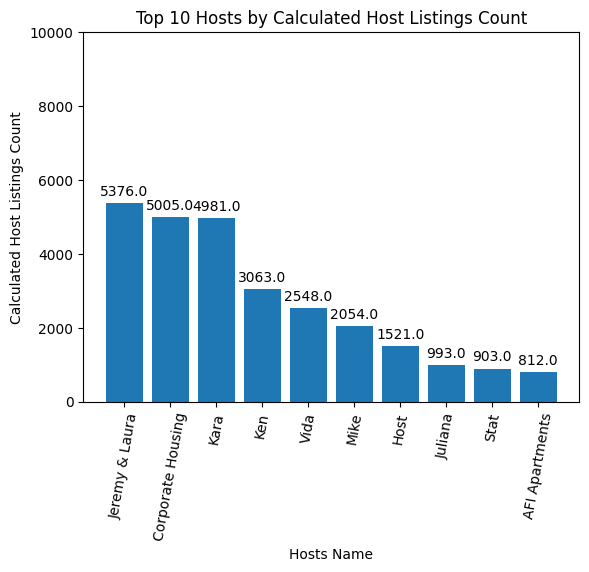

In [23]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],label_type='edge',padding=3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.title('Top 10 Hosts by Calculated Host Listings Count');
plt.ylim([0,10000]);

Are hosts with verified identities more likely to receive positive reviews?

In [24]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.003854
unconfirmed,2.987426


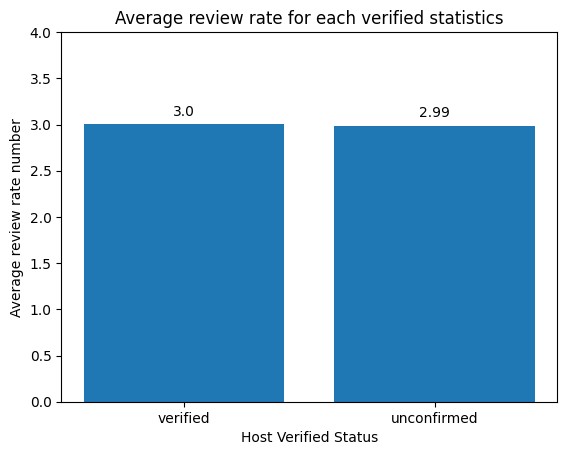

In [25]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verified Status');
plt.ylabel('Average review rate number');
plt.title('Average review rate for each verified statistics');

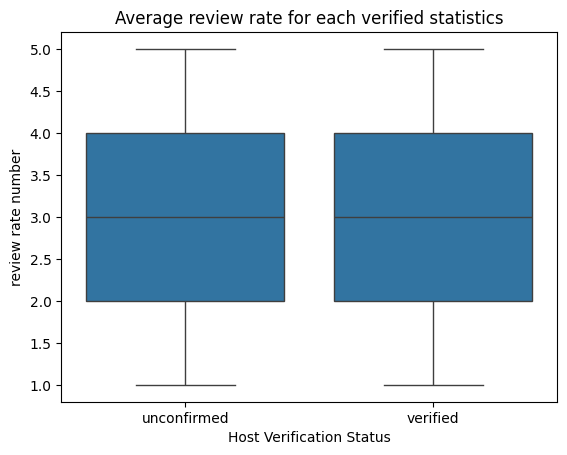

In [26]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number",color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('review rate number');
plt.title('Average review rate for each verified statistics');


is there a correlation between the price between the price of a listing and its service fee?

In [27]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999910646516323)

A Regression plot showing the correlation between the price and service fee

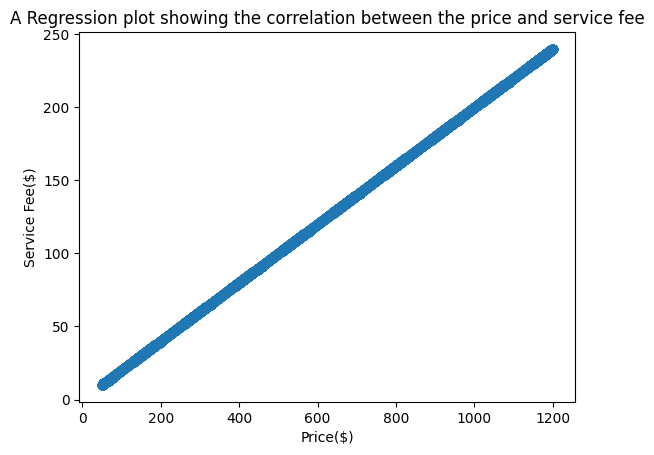

In [28]:
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel('Price($)');
plt.ylabel('Service Fee($)');
plt.title('A Regression plot showing the correlation between the price and service fee');


What is the average review rate number for listings, and does it vary based on the neighbourhood group and room type?

In [29]:
ARRN= df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.084112
                    Private room               2.939086
                    Shared room                2.625000
Brooklyn            Entire home/apt            2.955128
                    Private room               3.013841
                    Shared room                3.040404
Manhattan           Entire home/apt            3.016000
                    Private room               3.016555
                    Shared room                2.897638
Queens              Entire home/apt            2.950635
                    Private room               2.967647
                    Shared room                3.125000
Staten Island       Entire home/apt            2.950820
                    Private room               3.163636

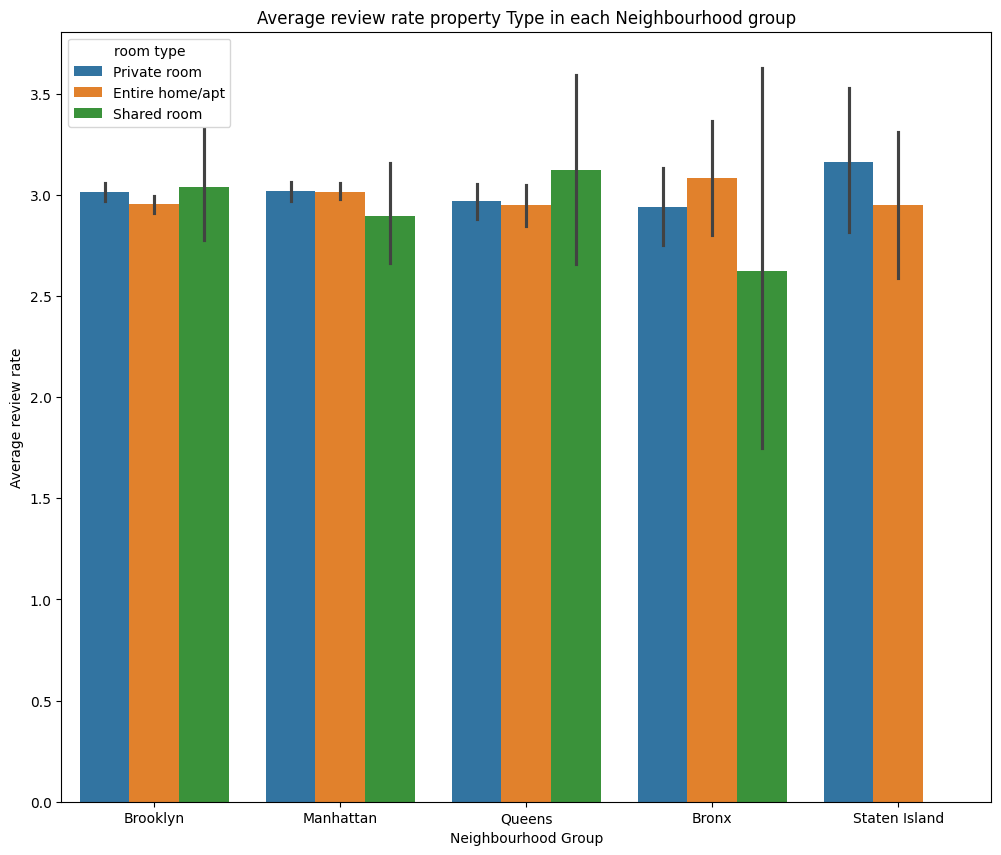

In [30]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average review rate');
plt.title('Average review rate property Type in each Neighbourhood group');


Are hosts with a higher calculated listings count more likely to maintain higher availability throughout the year?

Text(0.5, 1.0, 'A Regression plot of the relationship between calculated host listings and availability 365')

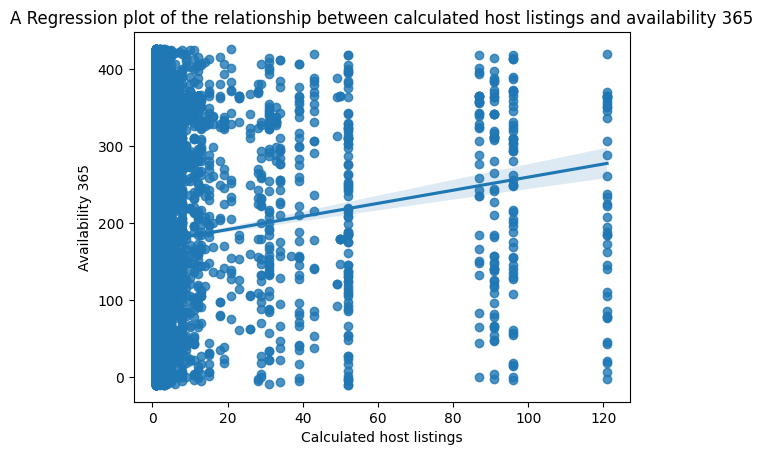

In [31]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated host listings');
plt.ylabel('Availability 365');
plt.title('A Regression plot of the relationship between calculated host listings and availability 365')

In [32]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.06949209917883799)